In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [2]:
import ktrain
from ktrain import text

In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Markdown
from IPython.display import display

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv("./data/TrainVal.csv")
data.sample(10)

,tweet,label,tweet_cleaned,tweet_len
4966,PUBLICATION @TheLancet ➡️#COVID19-related disr...,real,public ➡ ️covid 19 relat disrupt malaria contr...,32
4230,Trump Denies French Claims That Coronavirus Wa...,fake,trump deni french claim coronaviru present fra...,16
1176,Intrepid Investigative Reporting Reveals the M...,fake,intrepid investig report reveal mysteri ingred...,14
752,The coronavirus was created in a lab and paten...,fake,coronaviru creat lab patent,9
2343,RT @PIB_India: #CoronaWatch ◾ 2027074 total co...,real,coronawatch ◾ 2027074 total confirm case ◾ 137...,18
7765,476 new cases of #COVID19Nigeria; Lagos-235 FC...,real,476 new case covid 19nigeria lago 235 fct 44 k...,30
6995,Health Secretary Matt Hancock has not ruled ou...,real,health secretari matt hancock rule second nati...,25
4655,@FamiliaFeeling But you can always get that da...,real,alway get day day go spreadsheet look state da...,37
2470,Originator of Johns Hopkins COVID-19 Dashboard...,fake,origin john hopkin covid 19 dashboard sure dat...,19
3862,We‘ve received complaints from passengers depa...,real,‘ receiv complaint passeng depart nigeria airl...,38


In [5]:
data.tweet.str.split().apply(len).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

count    8560.00000
mean       26.94778
std        22.45087
min         3.00000
25%        15.00000
50%        25.00000
75%        37.00000
90%        44.00000
95%        47.00000
max      1456.00000
Name: tweet, dtype: float64

In [6]:
data.label.value_counts()

real    4480
fake    4080
Name: label, dtype: int64

In [7]:
trn, val, preproc = text.texts_from_df(
    data,
    text_column = "tweet",
    label_columns="label",
    maxlen=50,
    ngram_range=1,
    random_state=41,
    preprocess_mode="standard"
)

['fake', 'real']
      fake  real
5065   1.0   0.0
4761   0.0   1.0
2623   1.0   0.0
7367   1.0   0.0
3498   1.0   0.0
['fake', 'real']
      fake  real
1214   1.0   0.0
6002   1.0   0.0
3262   1.0   0.0
5198   0.0   1.0
2164   0.0   1.0
language: en
Word Counts: 22133
Nrows: 7704
7704 train sequences
train sequence lengths:
	mean : 30
	95percentile : 51
	99percentile : 58
x_train shape: (7704,50)
y_train shape: (7704, 2)
Is Multi-Label? False
856 test sequences
test sequence lengths:
	mean : 28
	95percentile : 49
	99percentile : 56
x_test shape: (856,50)
y_test shape: (856, 2)


In [8]:
model = text.text_classifier('nbsvm', trn , preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 50
building document-term matrix... this may take a few moments...
rows: 1-7704
computing log-count ratios...
done.


In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 2)        40000       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 50, 1)        20000       ['input_1[0][0]']                
                                                                                                  
 dot (Dot)                      (None, 2, 1)         0           ['embedding[0][0]',              
                                                                  'embedding_1[0][0]']        

In [10]:
learner = ktrain.get_learner(model, 
                             train_data=trn, 
                             val_data=val, 
                             batch_size=64)

In [11]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
121/121 [==============================] - 0s 788us/step - loss: 0.7012 - accuracy: 0.4869
Epoch 2/1024
121/121 [==============================] - 0s 789us/step - loss: 0.7006 - accuracy: 0.4888
Epoch 3/1024
121/121 [==============================] - 0s 792us/step - loss: 0.6988 - accuracy: 0.4958
Epoch 4/1024
121/121 [==============================] - 0s 776us/step - loss: 0.6929 - accuracy: 0.5221
Epoch 5/1024
121/121 [==============================] - 0s 828us/step - loss: 0.6743 - accuracy: 0.5914
Epoch 6/1024
121/121 [==============================] - 0s 866us/step - loss: 0.6243 - accuracy: 0.7395
Epoch 7/1024
121/121 [==============================] - 0s 896us/step - loss: 0.5252 - accuracy: 0.8300
Epoch 8/1024
121/121 [==============================] - 0s 888us/step - loss: 0.3878 - accuracy: 0.9002
Epoch 9/1024
121/121 [==============================] - 0s 848us/step - loss: 0.2492 

Three possible suggestions for LR from plot:
	Longest valley (red): 4.71E-04
	Min numerical gradient (purple): 1.13E-03
	Min loss divided by 10 (omitted from plot): 4.70E-02


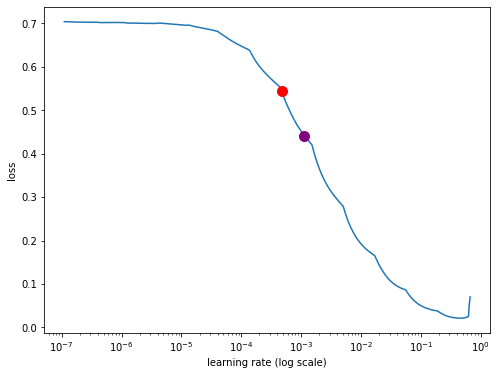

In [12]:
learner.lr_plot(suggest=True)

In [13]:
import gc
gc.collect()

14555

In [14]:
# 2e-5 is one of the LRs  recommended by Google and is consistent with the plot above.
learner.fit_onecycle(4.71E-04, 10)



begin training using onecycle policy with max lr of 0.000471...
Epoch 1/10
121/121 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6467 - val_loss: 0.5992 - val_accuracy: 0.7629
Epoch 2/10
121/121 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.8136 - val_loss: 0.5000 - val_accuracy: 0.8236
Epoch 3/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8673 - val_loss: 0.4240 - val_accuracy: 0.8703
Epoch 4/10
121/121 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.9058 - val_loss: 0.3648 - val_accuracy: 0.8972
Epoch 5/10
121/121 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.9298 - val_loss: 0.3184 - val_accuracy: 0.9182
Epoch 6/10
121/121 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.9415 - val_loss: 0.2878 - val_accuracy: 0.9311
Epoch 7/10
121/121 [==============================] - 0s 1ms/step - loss: 0.2476 -

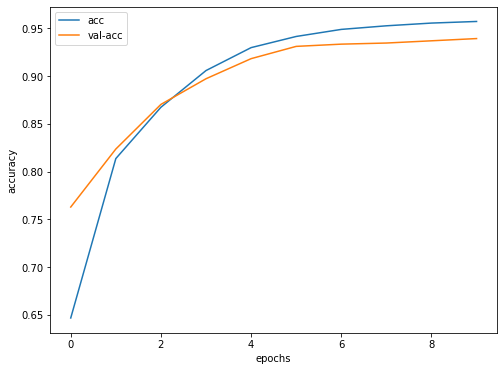

In [15]:
plt.plot(learner.history.history["accuracy"])
plt.plot(learner.history.history["val_accuracy"])
plt.legend(["acc", "val-acc"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

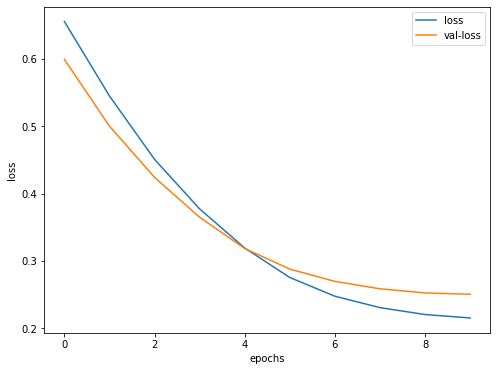

In [16]:
plt.plot(learner.history.history["loss"])
plt.plot(learner.history.history["val_loss"])
plt.legend(["loss", "val-loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [17]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [18]:
test_data = pd.read_csv("./data/TestLabel.csv", index_col=0)
test_data.sample(10)

,tweet,label
id,,
49,SUBHAN ALLAH: AFTER CORONA VIRUS CHINA GOVT LI...,fake
2110,#IndiaFightsCorona With more than 9 lakh #COVI...,real
1860,RT @alexismadrigal: Wanted to talk a little ab...,real
1509,Dr. VK Srinivas Vice-President of Bharath Biot...,fake
1609,There are 53 people linked to the community cl...,real
457,Sir Keir Starmer asks the prime minister about...,real
719,The World Health Organization (WHO) released a...,fake
298,Dr VK srinivas vice president Bharat biotech t...,fake
1872,We do face challenges. So far we have secured ...,real


In [19]:
probs = predictor.predict_proba(test_data["tweet"].values)
probs[:5]

array([[0.02086469, 0.97913533],
       [0.7626605 , 0.23733947],
       [0.98934036, 0.01065964],
       [0.02400439, 0.9759956 ],
       [0.16104965, 0.8389504 ]], dtype=float32)

In [20]:
y = (test_data.label == "real")
y.head()

id
1     True
2    False
3    False
4     True
5     True
Name: label, dtype: bool

In [21]:
import metrics as mmetrics

In [22]:
y = y.values.reshape((-1, 1))

perfs = mmetrics.get_performance_metrics(y, probs[:, 1:], ["logreg"])
perfs

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
logreg,1072,908,112,48,0.925,0.523,0.957,0.89,0.905,0.95,0.985,0.931,0.5
